# CS549-02 Machine Learning: Irfan Khan
# Assignment 3: Logistic Regression


**Total: 13 points**

In this assignment, you will implement logistic regression and apply it to a dataset to help make admission decisions

## Problem Statement

Suppose that you run a college admission preparation company and you want to determine each of your student’s chance of admission in SDSU based on their results on two exams you administer. The two exams are similar to MATH SAT and Verbal SAT exams

You have historical data from previous students that you can use as a training set for logistic regression. For each training example, you have the student’s scores and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based on the two scores.

## Import packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#math will come in handy later to implement the ceiling function

## 1 Load Data (1 point)
A3data excel file, containing sample data, has three columns, the first column has the Exam1 score, the 2nd column has the Exam2 score and the third column has the admission decision from SDSU (1: admit, 0: not admit). Load data from Excel spreadsheet A3data into X_train and y_train. Show the data on a scatter plot.

shape of sample data: (100, 3)


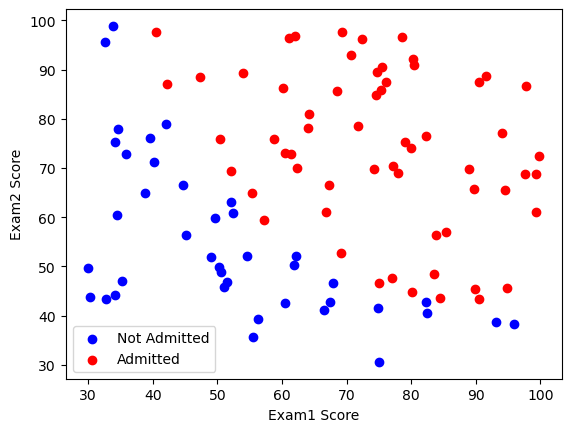

In [42]:
#Start your code
#Hint - use pandas to read the Excel file data and then extract the data to a nump array "data"

data = pd.read_excel('A3data.xlsx')

#End your code

print('shape of sample data:', data.shape) # Check if data is 100 by 3

#Load data into X_train a numpy array of shape (100,2) and y_train of shape (100,1)
#Start your code
X_train = data.iloc[:,:2].to_numpy()
y_train = data.iloc[:, 2].to_numpy().reshape(-1,1).flatten()


#End your code

#It is a good idea to visualize data on a scatter plot, if possible. Here we can.
x_class0 = X_train[y_train== 0]
x_class1 = X_train[y_train == 1]

# Create a scatter plot
plt.scatter(x_class0[:, 0], x_class0[:, 1], color='blue', label='Not Admitted')
plt.scatter(x_class1[:, 0], x_class1[:, 1], color='red', label='Admitted')

# Add labels and legend
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()


# Expected Result

shape of sample data: (100, 3)<br>

<img src="A3image1.png">


## 2 (1 point)

Implement the Sigmoid function

In [43]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    
    g = 1 / (1 + np.exp(-z))
    
    ### END SOLUTION ###  
    
    return g

# 3 (2 points)

Implement the cost function for Logistic Regression. We will use the b, w notation representing bias and weights respectively, instead of $\theta_{0}$ and $\theta_{i}$, $i=1,...$

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$


In [44]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for this assignment
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    z = np.dot(X,w) + b
    f_wb = sigmoid(z)
    total_cost = (-1 / m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    
    ### END CODE HERE ### 
    return total_cost

Check to see if you have implemented sigmoid and compute_cost functions correctly

In [45]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.3])
test_b = -14.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w =[0.2,0.3] and b = -14: {:.3f}'.format(cost))


Cost at test w =[0.2,0.3] and b = -14: 5.117


# Expected Result

Cost at test w =[0.2,0.3] and b = -14: 5.117

## 4 (3 points)

Implement Gradient for Logistic Regression

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously.


$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label



In [46]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 

    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    
    error = f_wb - y
    dj_dw = (1 / m)*np.dot(X.T, error)
    dj_db = (1 / m)*np.sum(error)
            
    ### END CODE HERE ###

        
    return dj_db, dj_dw

# Implement Gradient Descent Function

In [47]:
#No additional code needed. Just Run this cell

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

## Run Gradient Descent Algorithm

In [48]:
#No additional code needed. Just run this cell
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


# Expected Output

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31<br>
Iteration 2000: Cost     0.30<br>
Iteration 3000: Cost     0.30<br>
Iteration 4000: Cost     0.30<br>
Iteration 5000: Cost     0.30  
Iteration 6000: Cost     0.30<br>
Iteration 7000: Cost     0.30<br>
Iteration 8000: Cost     0.30<br>
Iteration 9000: Cost     0.30<br>
Iteration 9999: Cost     0.30  

## Plot the Decision Boundary

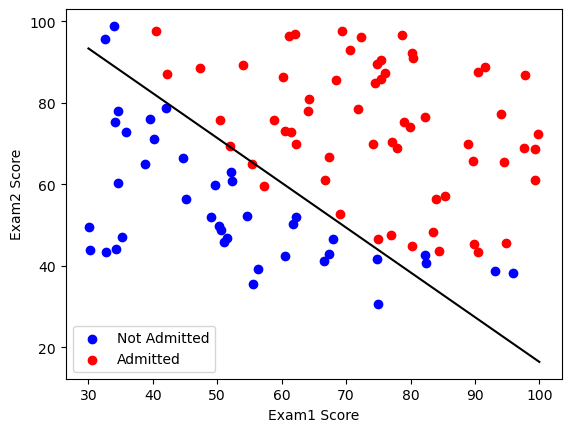

In [49]:
#No additional Code is needed. Just run this cell

# Create a scatter plot
plt.scatter(x_class0[:, 0], x_class0[:, 1], color='blue', label='Not Admitted')
plt.scatter(x_class1[:, 0], x_class1[:, 1], color='red', label='Admitted')
#Plot decision boundry
x1 = [30,40,50,60,70,80,90,100]
x2=-b/w[1]+np.dot (-w[0]/w[1],x1)

plt.plot(x1, x2, color='black')

# Add labels and legend
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()
plt.show()

# Expected Output

<img src="A3image2.png">

# 5 (1 point)

Use the learned logistic regression model to determine if a student with scores (70,50) is likely to get admitted to SDSU and if a student with scores (60,58) is likely to get admitted to SDSU. Print the results

In [50]:
#Start your code

X0 = 70
X1 = 50

if (b + w[0] * X0 + w[1] * X1) > 0:
    print('Student with score (70,50) Likely to Get Admitted')
else:
    print('Student with score (70,50) Not Likely to Get Admitted')
    
#End your code
X0 = 60
X1 = 58

#Start your code

if (b + w[0] * X0 + w[1] * X1) > 0:
    print('Student with score (60,58) Likely to Get Admitted')
else:
    print('Student with score (60,58) Not Likely to Get Admitted')

#End your code

Student with score (70,50) Likely to Get Admitted
Student with score (60,58) Not Likely to Get Admitted


# Expected Result

Student with score (70,50) Likely to Get Admitted <br>
Student with score (60,58) Not Likely to Get Admitted


## Determine Classification Predictions Based on Learned Logistic Regression Model


Using the learned parameters, b, w1 and w2, for each training data sample, predict the class 1 or 0 and store in array y_pred. 

In [25]:
# Create an empty array y_pred to store the predicted classifications
y_pred = np.zeros(100)

# Iterate through each row of X to calculate predictions
for i in range(100):
  # Calculate the linear combination of features and bias
  z = w[0] * X_train[i, 0] + w[1] * X_train[i, 1] + b

  # Apply the sigmoid function to get the predicted probability
  probability = 1 / (1 + np.exp(-z))

  # Classify as 1 if probability is above 0.5, otherwise as 0
  y_pred[i] = 1 if probability > 0.5 else 0

# Now, the array y_pred contains the predicted classifications for each sample



# 6. Calculate evaluation metrics

**2 points**

From C and actual $y$ values for each of the 100 samples, calculate the 8 evaluation metrics.

**NOTE**: We assume that label y = 1 is positive, and y = 0 is negative. 

In [52]:
# Task 7.
# Calculate TP, FP, TN, FN, Accuracy, Precision, Recall, and F-1 score
# We assume that label y = 1 is positive, and y = 0 is negative
def calc_metrics(Y_actual, Y_pred):
    """
    Calculate metrics
    
    Args:
    Y_actual -- test label
    Y_pred_sigmoid -- predictions on test data
    
    Return:
    metrics -- a dict object
    """
    #Calculate Y_pred = 1 or 0 depending on Y_pred_Sigmoid >0 or <=0 respectively
    
    assert(Y_actual.shape == Y_pred.shape)
    
    ##### START YOUR CODE #####
    
    TP = np.sum((Y_pred == 1) & (Y_actual == 1))
    
    FP = np.sum((Y_pred == 1) & (Y_actual == 0))
    
    TN = np.sum((Y_pred == 0) & (Y_actual == 0))
    
    FN = np.sum((Y_pred == 0)  & (Y_actual == 1))
    
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FP) > 0 else 0
    
    F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
    
    
    ##### END YOUR CODE #####
    
    metrics = {
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1': F1
    }
    
    return metrics

In [53]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 7
m = calc_metrics(y_train, y_pred)
print('TP = {}, FP = {}, TN = {}, FN = {}, \nAccuracy = {}, Precision = {}, Recall = {}, F1 = {}'.format(
    m['TP'], m['FP'], m['TN'], m['FN'], m['Accuracy'], m['Precision'], m['Recall'], m['F1']
))

TP = 58, FP = 6, TN = 34, FN = 2, 
Accuracy = 0.92, Precision = 0.90625, Recall = 0.9666666666666667, F1 = 0.9354838709677419


### Expected output
TP = 58, FP = 6, TN = 34, FN = 2,<br> 
Accuracy = 0.92, Precision = 0.90625, Recall = 0.9666666666666667, F1 = 0.9354838709677419

# 7. Perceptron

**2 Points**

Implement a Perceptron Training Algorithm, perceptron_training that takes as input the sample data X, labels y (1/-1), initial weights w, initial offset b, max number of iterations to run (max_iter). The perceptron returns:
1. If the data is linearly separable, the trained weights (w), trained offset (b), last iteration number (iter_number) executed, and a boolean changed set to FALSE, which implies the algorithm had converged before returning.
2. If the data is not linearly separable, w, b are returned but meaningless, last iteration number executed which should equal max_iter, and a boolean changed set to TRUE, which implies that the algorithm hadn't converged before returning.

In [54]:
def perceptron_training(X, y, w, b, max_iter):
    ###start your code###
    n_samples, n_features = X.shape
    changed = False
    iter_number = 0
    
    for iter_number in  range(1, max_iter+1):
        no_misclassifications = True
        
        for i in range(n_samples):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                w += y[i] * X[i]
                b += y[i]
                
                no_misclassifications = False

        if no_misclassifications:
            changed = False
            return w, b, iter_number, changed
    
    changed = True

    #### END YOUR CODE ####
    return w, b, iter_number, changed



# The two code cells below invoke the perceptron_training function for example data sets. Leave the below two code cells unchanged.

Algorithm converged at Iteration No: 17
Final w: [2. 5.]
Final b: -6


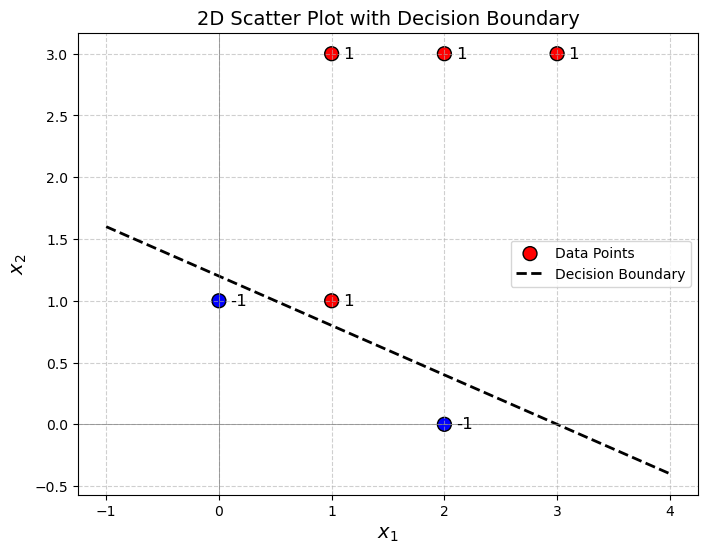

In [55]:

#Don't change this code cell
import numpy as np
import matplotlib.pyplot as plt


# Linearly Separable Dataset
X = np.array([[2, 3], [1, 1], [2, 0], [0, 1], [1, 3], [3, 3]])
y = np.array([1, 1, -1, -1, 1, 1])  # Labels

# Initialize w and b
w = np.zeros(X.shape[1])
b = 0
max_iter = 200  # Maximum number of iterations
# Train the perceptron
final_w, final_b, iter_no, changed = perceptron_training(X, y, w, b, max_iter)
# Print final results
if changed:
    print ('Algorithm did not converge and ran',iter_no,'times')
else:
    print ('Algorithm converged at Iteration No:', iter_no)
    print("Final w:", final_w)
    print("Final b:", final_b)

    #Plot the data set and the linear separation boundary
    # Extract x1 and x2 from X
    x1 = X[:, 0]  # First component
    x2 = X[:, 1]  # Second component

    # Set colors based on labels
    colors = ['red' if label == 1 else 'blue' for label in y]


    # Generate x1 values for the decision boundary
    x1_range = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    x2_boundary = - (final_w[0] * x1_range + final_b) / final_w[1]  # Solve for x2

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x1, x2, c=colors, s=100, edgecolors='k', label='Data Points')

    # Annotate each point with its label
    for i, label in enumerate(y):
        plt.text(x1[i] + 0.1, x2[i], str(label), fontsize=12, verticalalignment='center')

    # Plot the decision boundary
    plt.plot(x1_range, x2_boundary, 'k--', linewidth=2, label='Decision Boundary')

    # Labels and formatting
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title('2D Scatter Plot with Decision Boundary', fontsize=14)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.show()

# Expected Result

Last Iteration Number 17<br>
Final w: [2. 5.]<br>
Final b: -6<br>
<img src="A3image3.png">

## Decision Boundary Equation
**1 Points**

In the empty markdown cell below, write down the equation for the linear decision boundary, as x2 = slope * x1 + x2 intercept

In [56]:
#Don't change this code cell

import numpy as np
import matplotlib.pyplot as plt


# Linearly Separable Dataset
X = np.array([[2, 3], [1, 0.5], [2, 0], [0, 1], [1, 3], [3, 3]])
y = np.array([1, 1, -1, -1, 1, 1])  # Labels

# Initialize w and b
w = np.zeros(X.shape[1])
b = 0
max_iter = 200  # Maximum number of iterations
# Train the perceptron
final_w, final_b, iter_no, changed = perceptron_training(X, y, w, b, max_iter)
# Print final results
if changed:
    print ('Algorithm did not converge and ran',iter_no,'times')
else:
    print ('Algorithm converged at Iteration No:', iter_no)
    print("Final w:", final_w)
    print("Final b:", final_b)

    #Plot the data set and the linear separation boundary
    # Extract x1 and x2 from X
    x1 = X[:, 0]  # First component
    x2 = X[:, 1]  # Second component

    # Set colors based on labels
    colors = ['red' if label == 1 else 'blue' for label in y]


    # Generate x1 values for the decision boundary
    x1_range = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    x2_boundary = - (final_w[0] * x1_range + final_b) / final_w[1]  # Solve for x2

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x1, x2, c=colors, s=100, edgecolors='k', label='Data Points')

    # Annotate each point with its label
    for i, label in enumerate(y):
        plt.text(x1[i] + 0.1, x2[i], str(label), fontsize=12, verticalalignment='center')

    # Plot the decision boundary
    plt.plot(x1_range, x2_boundary, 'k--', linewidth=2, label='Decision Boundary')

    # Labels and formatting
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title('2D Scatter Plot with Decision Boundary', fontsize=14)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.show()

Algorithm did not converge and ran 200 times


# Expected Result
Algorithm did not converge and ran 200 times